Generación 1


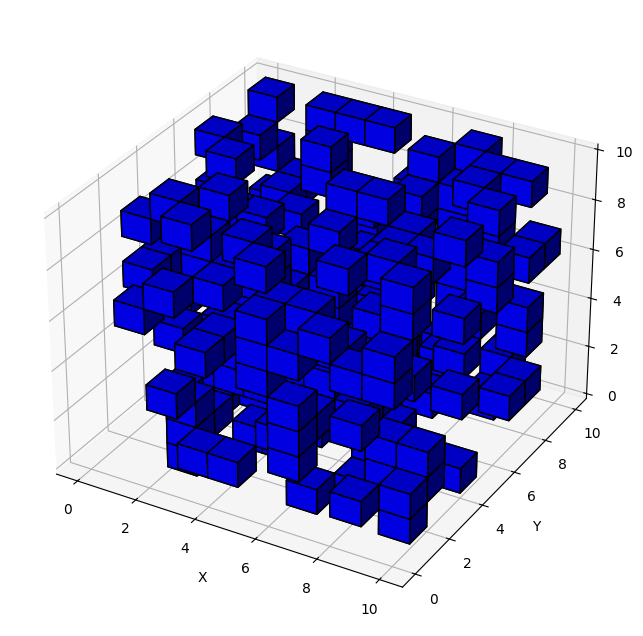

Generación 2


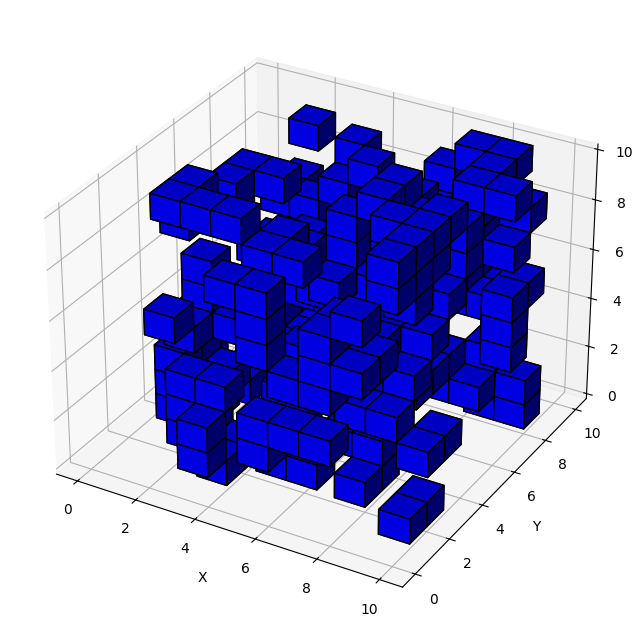

Generación 3


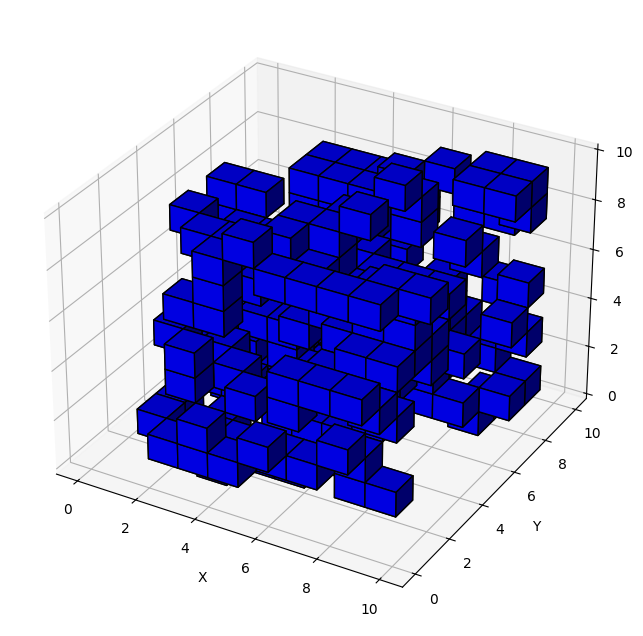

Generación 4


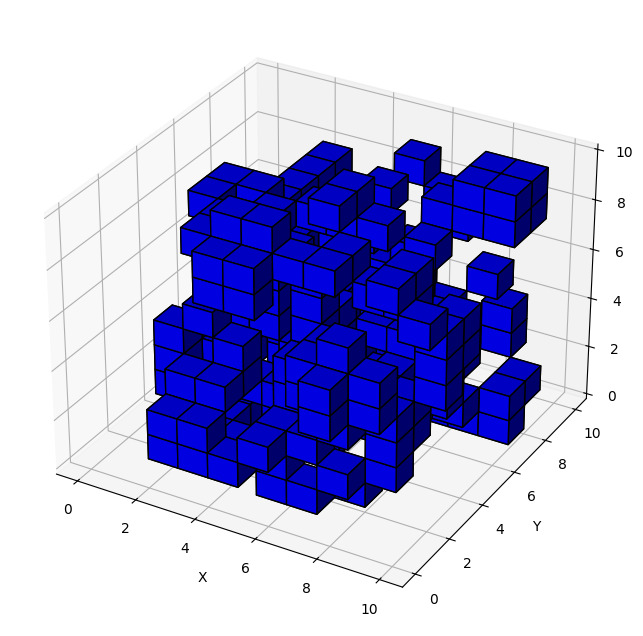

Generación 5


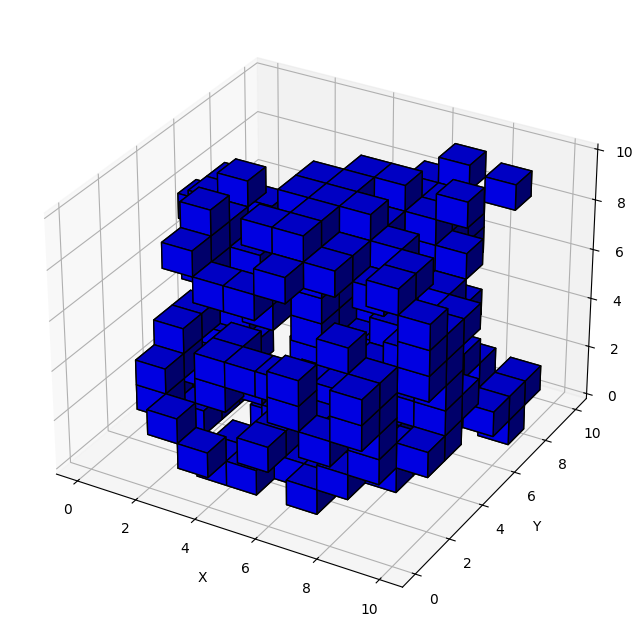

Generación 6


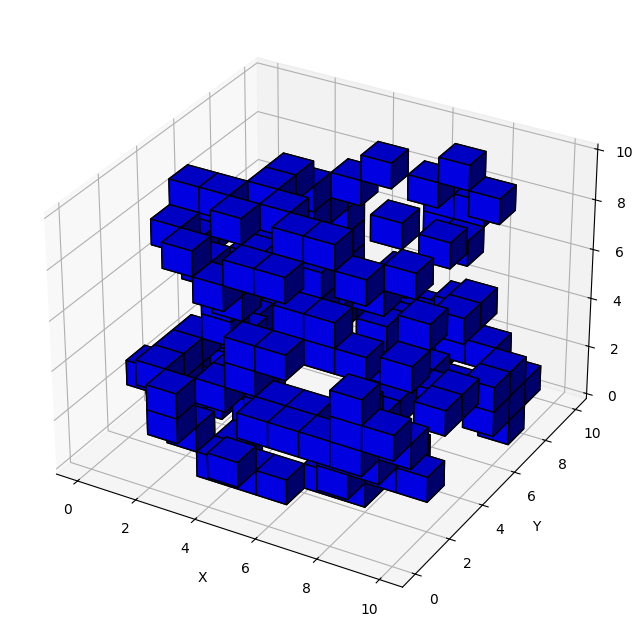

Generación 7


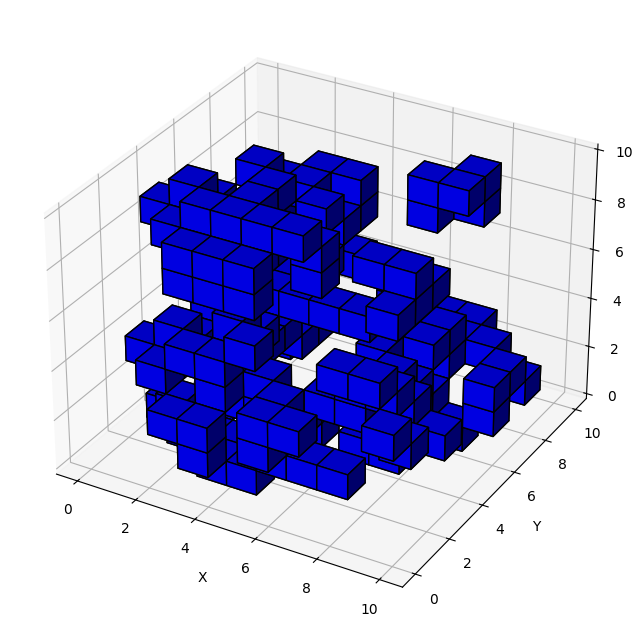

Generación 8


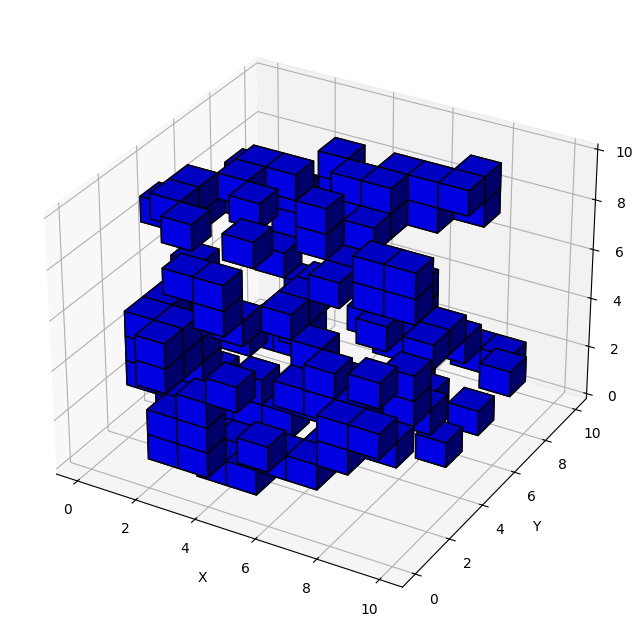

Generación 9


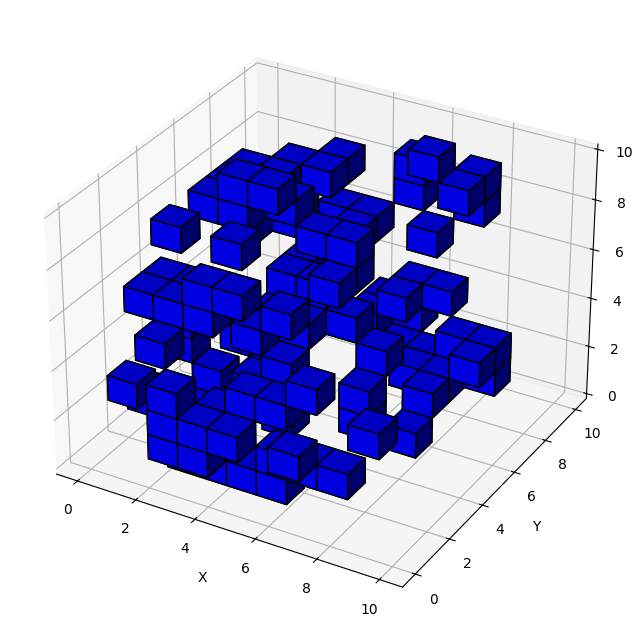

Generación 10


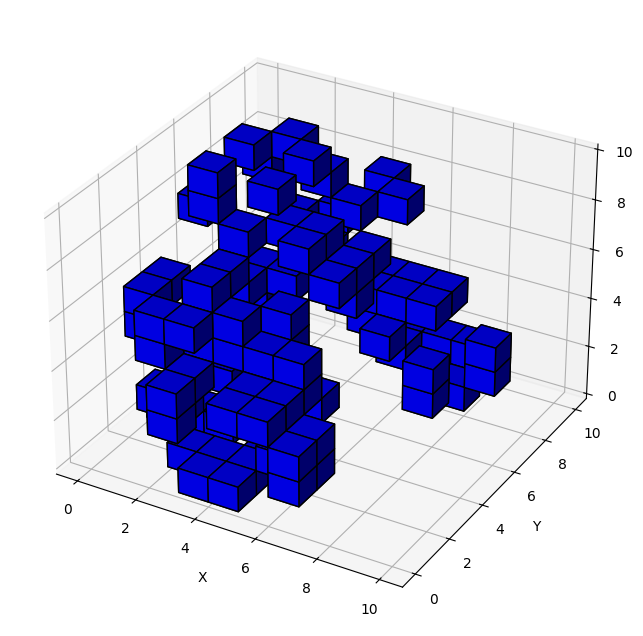

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def create_initial_state(shape):
    """Crea el estado inicial del autómata con celdas aleatorias activadas."""
    return np.random.choice([0, 1], size=shape, p=[0.8, 0.2])  # 20% activado

def count_neighbors(state, x, y, z):
    """Cuenta los vecinos activos de una celda en un espacio 3D."""
    neighbors = 0
    directions = [-1, 0, 1]
    for dx in directions:
        for dy in directions:
            for dz in directions:
                if dx == 0 and dy == 0 and dz == 0:
                    continue  # Ignorar la celda actual
                nx, ny, nz = x + dx, y + dy, z + dz
                if 0 <= nx < state.shape[0] and 0 <= ny < state.shape[1] and 0 <= nz < state.shape[2]:
                    neighbors += state[nx, ny, nz]
    return neighbors

def update_state(state):
    """Actualiza el estado del autómata siguiendo las reglas de Conway extendidas a 3D."""
    new_state = np.zeros_like(state)
    for x in range(state.shape[0]):
        for y in range(state.shape[1]):
            for z in range(state.shape[2]):
                neighbors = count_neighbors(state, x, y, z)
                if state[x, y, z] == 1 and (neighbors == 4 or neighbors == 5):
                    new_state[x, y, z] = 1  # Sobrevive
                elif state[x, y, z] == 0 and neighbors == 5:
                    new_state[x, y, z] = 1  # Nace
    return new_state

def plot_3d(state):
    """Dibuja el estado actual del autómata en 3D."""
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.voxels(state, facecolors='blue', edgecolor='k')
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    plt.show()

# Parámetros
shape = (10, 10, 10)  # Dimensiones del autómata
steps = 10  # Número de iteraciones

# Inicializar autómata celular
state = create_initial_state(shape)

# Simulación
for step in range(steps):
    print(f"Generación {step + 1}")
    plot_3d(state)
    state = update_state(state)
